# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import pprint as pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
## Install it from cmd prompt: (base) C:\me\Programming>pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
## random.uniform: Draw samples from a uniform distribution.
## returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

## create (lat, lng) tuple lists
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
## fetch the first 60 cities and use it as a test set for coding
# test_cities = cities[0:70]
# print(len(test_cities))
# print(test_cities)



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Weather Check Using API Calls

In [4]:
MAX_NUM_RECORD_PER_SET = 49

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
## Declare a list of variables to hold the Max Temperature, Humidity, Cloudiness, Wind Speed, and Country
lat_ar = []
lng_ar = []
max_temperature_ar = []
humidity_ar = []
cloudiness_ar = []
wind_speed_ar = []
date_ar = []
country_ar = []

set_no = 1
record_no = 0

## print the log file header
print("Beginning Data Retrieval")
print("-------------------------------")

## for loop: 
##for i in range(70):
for i in range(len(cities)):
    ## Avoid overloading the system with API requests
    time.sleep(1) 
    
    ##city_url = query_url + cities[i]
    city_url = query_url + cities[i]
    
    ## print(f"City_url = {city_url}")
    
    response_json = requests.get(city_url).json()

    ## Catch the situations with the attribute name, but value is empty
    try: 
        lat_ar.append(response_json['coord']['lat'])
        lng_ar.append(response_json['coord']['lon'])
        max_temperature_ar.append(response_json['main']['temp_max'])
        humidity_ar.append(response_json['main']['humidity'])
        cloudiness_ar.append(response_json['clouds']['all'])
        wind_speed_ar.append(response_json['wind']['speed'])
        date_ar.append(response_json['dt'])
        country_ar.append(response_json['sys']['country'])
        
        ## print the log file line for each city: 
        print(f"Processing Record {record_no} of Set {set_no} | {cities[i]}")
            
        ## check to see if city_no = 50, if so, increment set_no
        ## set the record_no and set_no for the next round of log printing
        if record_no == MAX_NUM_RECORD_PER_SET:
            record_no = 0
            set_no += 1
            ##print(f"record_no = {record_no}, set_no = {set_no}")
        else:
            record_no += 1
            ##print(f"Just add 1 to record_no: record_no = {record_no}")     
        
    except KeyError:
        ## don't have data -> put NaN
        lat_ar.append(np.nan)
        lng_ar.append(np.nan)
        max_temperature_ar.append(np.nan)
        humidity_ar.append(np.nan)
        cloudiness_ar.append(0)
        wind_speed_ar.append(np.nan)
        date_ar.append(np.nan)
        country_ar.append(np.nan)
        print(f"City | {cities[i]} not found. Skipping...")
        ##print(f"record_no = {record_no}, set_no = {set_no}")
    
## print the log file ending sentence
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")
  

Beginning Data Retrieval
-------------------------------
Processing Record 0 of Set 1 | ugoofaaru
Processing Record 1 of Set 1 | yar-sale
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | morehead
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | riberalta
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | alice springs
City | makrikapa not found. Skipping...
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | northam
Processing Record 14 of Set 1 | les cayes
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | mokhsogollokh
City | attawapiskat not found. Skipping...
Processing Record 17 of Set 1 | alta floresta
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | broome
City | amderma not found. Skipp

SSLError: HTTPSConnectionPool(host='api.openweathermap.org', port=443): Max retries exceeded with url: /data/2.5/weather?appid=1fa98e64fbbac2cfef65abb1dfe8e1c9&units=imperial&q=east%20london (Caused by SSLError(SSLError("bad handshake: SysCallError(-1, 'Unexpected EOF')",),))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
## Creata a dataframe with all the data retrieved
##city_weather_df = pd.DataFrame("City": cities, 
city_weather_df = pd.DataFrame({"City": cities, 
                               "Lat": lat_ar, 
                               "Lng": lng_ar,
                               "Max Temp": max_temperature_ar, 
                               "Humidity": humidity_ar,
                               "Cloudiness": cloudiness_ar,
                               "Wind Speed": wind_speed_ar,
                               "Country": country_ar,
                               "Date": date_ar
                               })

## before drop_na, 
old_len = len(city_weather_df["City"])
print(f"city_weather_df = {str(old_len)}")
# print(f"city_weather_df size is {len(city_weather_df["City"])}")

## Clean up df by dropping rows with NaN
clean_city_weather_df = city_weather_df.dropna(how='any')

new_len = len(clean_city_weather_df["City"])
print(f"clean_city_weather_df size is {str(new_len)}")

## export the city data into a csv file
clean_city_weather_df.to_csv('../output_data/cities.csv',encoding = 'utf-8',index = False)

## display the DataFrame
city_weather_df.head()

city_weather_df = 604
clean_city_weather_df size is 555


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,codrington,97,AU,1.617000e+09,57.0,-38.2667,141.9667,61.07,7.05
1,san patricio,90,US,1.617000e+09,67.0,28.0170,-97.5169,59.00,3.44
2,waingapu,100,ID,1.617000e+09,73.0,-9.6567,120.2641,84.78,9.98
3,mahibadhoo,100,MV,1.617000e+09,89.0,3.7833,72.9667,78.24,31.41
4,hermanus,0,ZA,1.617000e+09,75.0,-34.4187,19.2345,66.00,8.99


In [8]:
clean_city_weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,555.000000,5.550000e+02,555.000000,555.000000,555.000000,555.000000,555.000000
mean,49.572973,1.617001e+09,68.356757,19.838026,23.507902,58.534631,8.599622
std,40.923804,2.952692e+02,25.089708,33.508113,87.507682,25.451655,6.143305
min,0.000000,1.617000e+09,6.000000,-54.800000,-179.166700,-25.420000,0.160000
25%,6.000000,1.617000e+09,55.500000,-6.316700,-52.415000,41.000000,3.980000
50%,40.000000,1.617001e+09,74.000000,22.890900,26.400000,63.950000,6.910000
75%,97.000000,1.617001e+09,88.000000,46.766650,99.409050,77.540000,12.045000
max,100.000000,1.617001e+09,100.000000,78.218600,179.316700,106.410000,39.120000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.

## get the index list from the df
idx = clean_city_weather_df.index

## Get the indices that satisfy the humidity condition
humidity_exceed_max_indices = idx[clean_city_weather_df["Humidity"] > 100]

print(f"Number of cities with humidity > 100: {str(len(humidity_exceed_max_indices.tolist()))}")

## print the indices
humidity_exceed_max_indices


Number of cities with humidity > 100: 0


Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Skip this step because no city in clean_city_weather_df has humidity > 100. 

## print the clean_city_weather_df
clean_city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,codrington,97,AU,1.617000e+09,57.0,-38.2667,141.9667,61.07,7.05
1,san patricio,90,US,1.617000e+09,67.0,28.0170,-97.5169,59.00,3.44
2,waingapu,100,ID,1.617000e+09,73.0,-9.6567,120.2641,84.78,9.98
3,mahibadhoo,100,MV,1.617000e+09,89.0,3.7833,72.9667,78.24,31.41
4,hermanus,0,ZA,1.617000e+09,75.0,-34.4187,19.2345,66.00,8.99


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

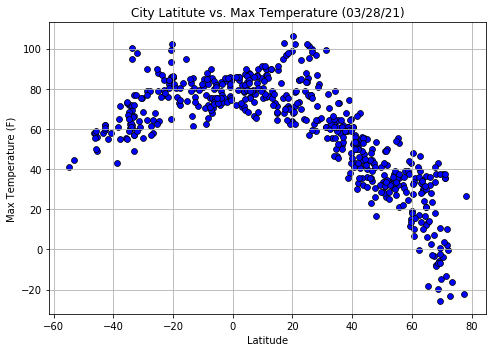

In [12]:
plt.figure(figsize=(7,5))

## Plot the lat vs the Max Temp
plt.scatter(x = clean_city_weather_df['Lat'], y = clean_city_weather_df['Max Temp'], linewidths = 0.75, color = 'blue', edgecolor = 'black', s = 35)
plt.grid()

## Label the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitute vs. Max Temperature (03/28/21)")

## Save the plot
plt.savefig("../output_data/CityLat_vs_MaxTemp.png")

## Show plot
plt.tight_layout()
plt.show()

Note: The hottest place is near equator whose latitude is zero. When moving away from equator, a) in the Northern hemisphere, the larger the latitute, the lower the temperature; b) In the Southern hemisphere, as the latitute decreases, so is the temperature. 



## Latitude vs. Humidity Plot

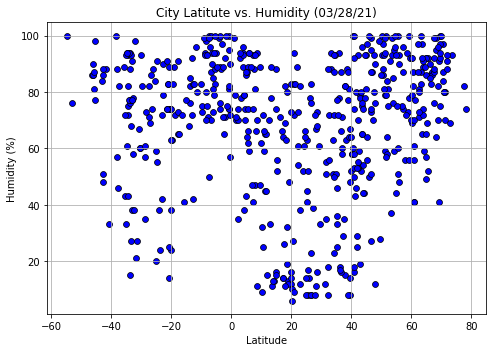

In [14]:
plt.figure(figsize=(7,5))

## Plot the lat vs Humidity
plt.scatter(x = clean_city_weather_df['Lat'], y = clean_city_weather_df['Humidity'], linewidths = 0.75, color = 'blue', edgecolor = 'black', s = 35)
plt.grid()

## Label the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitute vs. Humidity (03/28/21)")

## Save the plot
plt.savefig("../output_data/CityLat_vs_Humidity.png")

## Show plot
plt.tight_layout()
plt.show()

Note: Humidity is very high (>70%) near equator. 
In the Northern hemisphere, the humidity increases when latitute become bigger. In Southern hemisphere, the correlation between latitude and humidity is not strong.




## Latitude vs. Cloudiness Plot

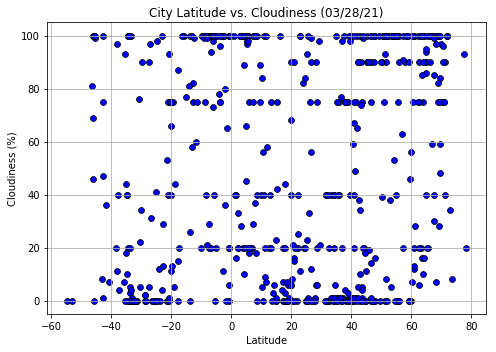

In [16]:
plt.figure(figsize=(7,5))

## Plot the lat vs Humidity
plt.scatter(x = clean_city_weather_df['Lat'], y = clean_city_weather_df['Cloudiness'], linewidths = 0.75, color = 'blue', edgecolor = 'black', s = 35)
plt.grid()

## Label the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (03/28/21)")

## Save the plot
plt.savefig("../output_data/CityLat_vs_Cloudiness.png")

## Show plot
plt.tight_layout()
plt.show()

Note: No clear relationship between latitude and cloudiness.



## Latitude vs. Wind Speed Plot

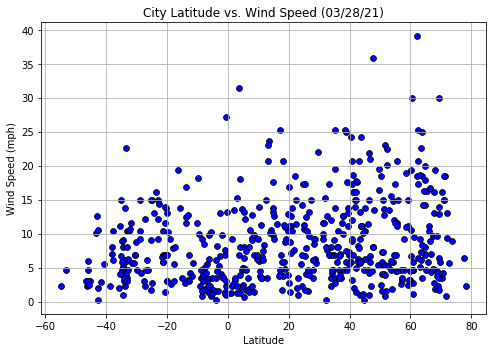

In [18]:
plt.figure(figsize=(7,5))

## Plot the lat vs Humidity
plt.scatter(x = clean_city_weather_df['Lat'], y = clean_city_weather_df['Wind Speed'], linewidths = 0.75, color = 'blue', edgecolor = 'black', s = 35)
plt.grid()

## Label the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (03/28/21)")

## Save the plot
plt.savefig("../output_data/CityLat_vs_WindSpeed.png")

## Show plot
plt.tight_layout()
plt.show()

Note: No strong correlation bewteen latitude and wind speed. However, we do see that as we move away from equator, the wind speed increase for a small number of cities. 

## Linear Regression

In [19]:
## The Equator, or line of 0 degrees latitude, divides the Earth into the Northern and Southern hemispheres. 
## Create two dataframes, one holds northern hemisphere data, one holds southern hemisphere data
northern_hemi_df = clean_city_weather_df.loc[clean_city_weather_df['Lat'] >= 0]
southern_hemi_df = clean_city_weather_df.loc[clean_city_weather_df['Lat'] < 0]

In [20]:
## Define a function to print r-squared value
## R-squared is a goodness-of-fit measure for linear regression models
def display_r_squared_line(x_values, y_values):
    print(f"The r-squared is: {round(st.pearsonr(x_values, y_values)[0],9)}")
    print("\n")

## Define a function for creating linear regression, and then draw scatter plot
def calc_linear_regress_func(x_values, y_values):
    ## Calculate the line y = kx + b
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    ## Plot the scatter plot with regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    return line_eq

## print the regression line
def print_regress_line_func(line_eq, a, b):
    plt.annotate(line_eq, (a, b), fontsize=15, color="red")

## print the equation on the plot
def display_line_eq_func(line_eq):
    ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.874632343




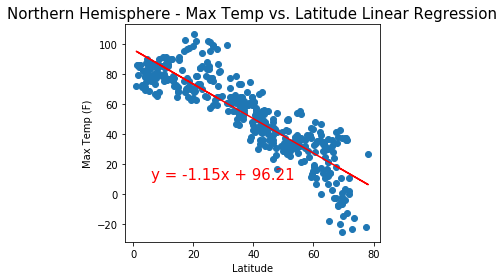

In [22]:
## Display r-squared statement: 
display_r_squared_line(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

## Call calc_linear_regress_func to calculate and display the regression line equation
north_hemi_line_eq = calc_linear_regress_func(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

## Call print_regress_line_func
print_regress_line_func(north_hemi_line_eq, 6, 10)

## Set the title, x-label and y-label
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression',fontsize =15)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Save the plot
plt.savefig("../output_data/NorthernHemisphere_MaxTemp_vs_Latitude_LinearRegression.png")

## Display the plot:
plt.tight_layout()
plt.show()


Note: The relatively tight fit of the regression model with the data points of Latitute & Max Temperature for the Northern Hemisphere. 
?? Not sure why the r-squared is negative. I thought it should be around 0.6 - 0.7 instead.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.581419779




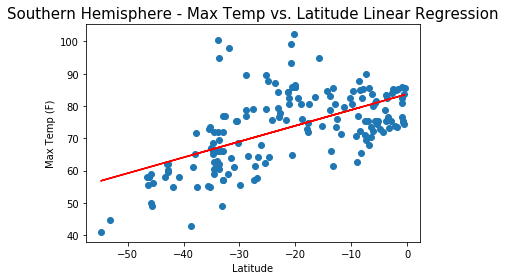

In [24]:
## Display r-squared statement: 
display_r_squared_line(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

## Call calc_linear_regress_func to calculate and display the regression line equation
south_hemi_line_eq = calc_linear_regress_func(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

## Call print_regress_line_func
print_regress_line_func(south_hemi_line_eq, 6, 10)

## Set the title, x-label and y-label
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression',fontsize =15)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Save the plot
plt.savefig("../output_data/SouthernHemisphere_MaxTemp_vs_Latitude_LinearRegression.png")

## Display the plot:
plt.show()


Note: Moderate positive correlation was observed between the latitude and the maximum temperature for Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.32607236




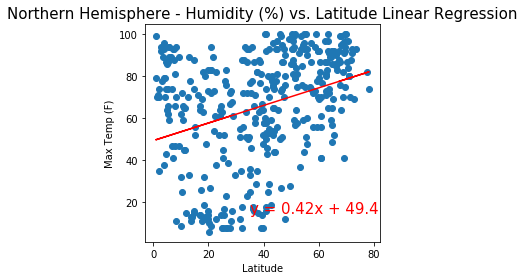

In [26]:
## Display r-squared statement: 
display_r_squared_line(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

## Call calc_linear_regress_func to calculate and display the regression line equation
north_Lat_hum_line_eq = calc_linear_regress_func(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

## Call print_regress_line_func
print_regress_line_func(north_Lat_hum_line_eq, 35, 15)

## Set the title, x-label and y-label
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression',fontsize =15)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Save the plot
plt.savefig("../output_data/NorthernHemisphere_Humidity_vs_Latitude_LinearRegression.png")

## Display the plot:
plt.tight_layout()
plt.show()

Note: Moderate positive correlation between Lat and Humidity for the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.199271501




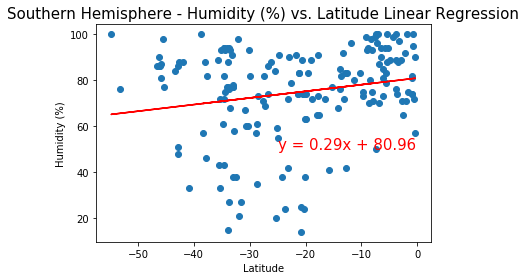

In [27]:
## Display r-squared statement: 
display_r_squared_line(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

## Call calc_linear_regress_func to calculate and display the regression line equation
south_hemi_line_eq = calc_linear_regress_func(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

## Call print_regress_line_func
print_regress_line_func(south_hemi_line_eq, -25, 50)

## Set the title, x-label and y-label
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression',fontsize =15)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the plot
plt.savefig("../output_data/SouthernHemisphere_Humidity_vs_Latitude_LinearRegression.png")

## Display the plot:
plt.show()


Note: For Southern hemisphere, We can see a small positive correlation between humidity and latitude. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.234216559




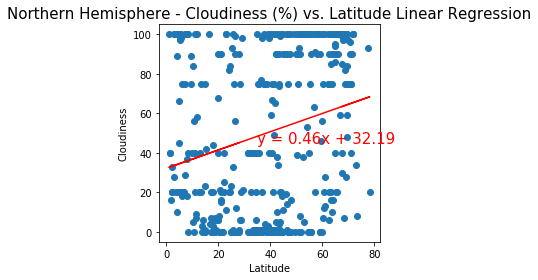

In [28]:
## Display r-squared statement: 
display_r_squared_line(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

## Call calc_linear_regress_func to calculate and display the regression line equation
north_Lat_cloud_line_eq = calc_linear_regress_func(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

## Call print_regress_line_func
print_regress_line_func(north_Lat_cloud_line_eq, 35, 45)

## Set the title, x-label and y-label
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',fontsize =15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the plot
plt.savefig("../output_data/NorthernHemisphere_Cloudiness_vs_Latitude_LinearRegression.png")

## Display the plot:
plt.tight_layout()
plt.show()

Note: Slightly positive correlation between latitude and Cloudiness. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.367384101




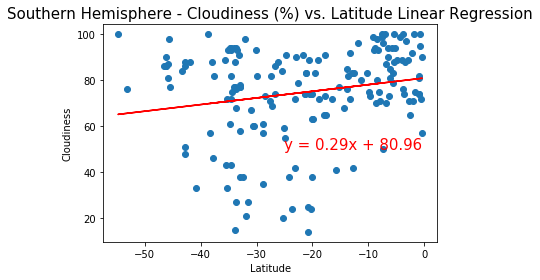

In [29]:
## Display r-squared statement: 
display_r_squared_line(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

## Call calc_linear_regress_func to calculate and display the regression line equation
south_hemi_cloud_line_eq = calc_linear_regress_func(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

## Call print_regress_line_func
print_regress_line_func(south_hemi_cloud_line_eq, -25, 50)

## Set the title, x-label and y-label
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',fontsize =15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the plot
plt.savefig("../output_data/SouthernHemisphere_Cloudiness_vs_Latitude_LinearRegression.png")

## Display the plot:
plt.show()


Note: The correlation between cloudiness and city latitude is not strong. We can see a slightly correlation between them.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.135377573




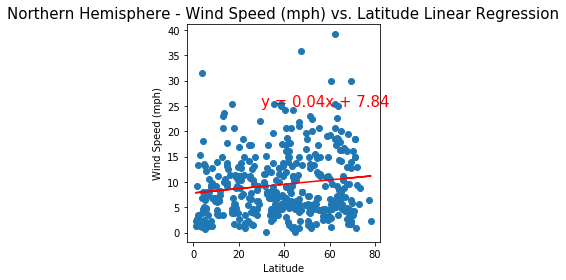

In [30]:
## Display r-squared statement: 
display_r_squared_line(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

## Call calc_linear_regress_func to calculate and display the regression line equation
north_Lat_wind_line_eq = calc_linear_regress_func(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# plt.figure(figsize=(15,10))

## Call print_regress_line_func
print_regress_line_func(north_Lat_wind_line_eq, 30, 25)

## Set the title, x-label and y-label
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression',fontsize =15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save the plot
plt.savefig("../output_data/NorthernHemisphere_wind_vs_Latitude_LinearRegression.png")

## Display the plot:
plt.tight_layout()
plt.show()

Note: In Northern hemisphere, there is a very small positive correlation between the Wind Speed and Latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.043730793




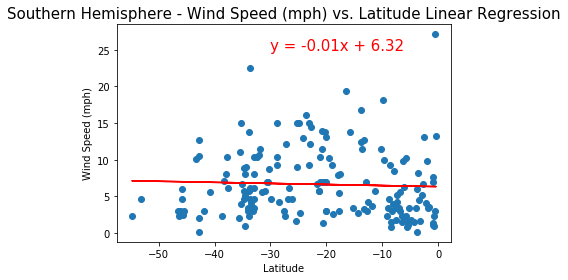

In [32]:
## Display r-squared statement: 
display_r_squared_line(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

## Call calc_linear_regress_func to calculate and display the regression line equation
south_hemi_wind_line_eq = calc_linear_regress_func(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

## Call print_regress_line_func
print_regress_line_func(south_hemi_wind_line_eq, -30, 25)

## Set the title, x-label and y-label
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression',fontsize =15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save the plot
plt.savefig("../output_data/SouthernHemisphere_wind_vs_Latitude_LinearRegression.png")

## Display the plot:
plt.show()


Note: In the Southern hemisphere, as the latitute increases, the wind speed decreases. The correlation is moderate.